In [1]:
from mcbj import *
from tqdm.notebook import tqdm
import filter_traces
import plots
import pandas as pd
from matplotlib import rcParams
date = "21_12_08"
sample_rate = 50_000
home_folder = Path(f"D:/BJ_Data/{date}")
import numpy as np
from matplotlib.ticker import MultipleLocator

import utils

In [6]:
trace_pair=TracePair(3, load_from=home_folder)

In [48]:
print(trace_pair.piezo_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]])
print(trace_pair.conductance_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]])

106.80752193334108
0.69119453


In [49]:
print(trace_pair.piezo_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]+1])
print(trace_pair.conductance_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]+1])

106.80758228265427
0.30536452


In [50]:
print(trace_pair.conductance_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]+1]-
      trace_pair.conductance_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]])

-0.38583001


In [51]:
print(trace_pair.piezo_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]+1]-
      trace_pair.piezo_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]])

6.034931318765757e-05


In [60]:
def interpolate(ind1, ind2, x=None, y=None):
    if x is not None and y is None:
        return ind1[1] + (x-ind1[0])*(ind2[1]-ind1[1])/(ind2[0]-ind1[0])
    elif y is not None and x is None:
        return ind1[0] + (y-ind1[1])*(ind2[0]-ind1[0])/(ind2[1]-ind1[1])
    else:
        raise ValueError('Please enter either `x` or `y`, not both.')

In [ ]:
interpolate((trace_pair.piezo_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]],
             trace_pair.conductance_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]]),
            (trace_pair.piezo_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]+1],
             trace_pair.conductance_pull[np.where(trace_pair.conductance_pull > 0.5)[0][-1]+1]),
            y=0.5)

In [ ]:
interpolate((trace_pair.piezo_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]],
             trace_pair.conductance_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]]),
            (trace_pair.piezo_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]+1],
             trace_pair.conductance_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]+1]),
            y=0.5)

In [ ]:
3/50_000

In [ ]:
trace_pair.conductance_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]+1]

In [ ]:
ax = trace_pair.plot_trace_pair(dpi=300)
ax.set_xlim(105.771, 105.772)
ax.axhline(0.5, ls='--', lw=0.5, c='k')
ax.axvline(trace_pair.piezo_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]], ls='--', lw=0.5, c='b')
ax.axvline(trace_pair.piezo_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]+1], ls='--', lw=0.5, c='k')
ax.axvline(105.77143957958219, ls='--', lw=0.5, c='r')
# 106.80755183889114

In [79]:
trace_pair.conductance_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]+1]

0.5301662

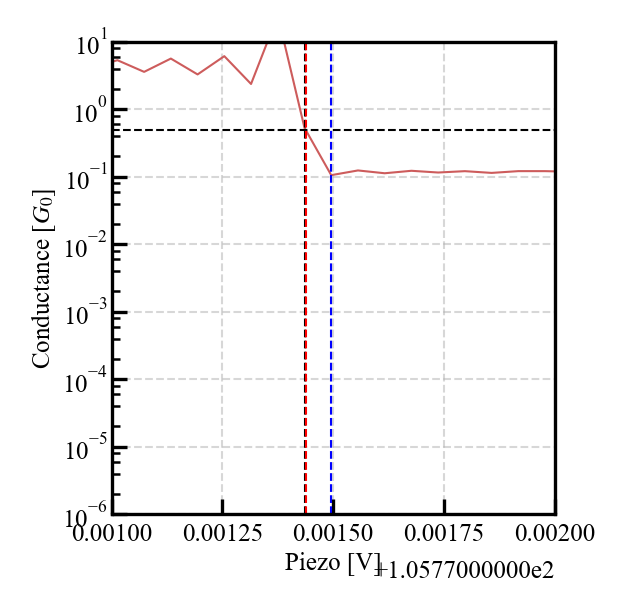

In [82]:
ax = trace_pair.plot_trace_pair(dpi=300)
ax.set_xlim(105.771, 105.772)
ax.axhline(0.5, ls='--', lw=0.5, c='k')
ax.axvline(trace_pair.piezo_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]], ls='--', lw=0.5, c='b')
ax.axvline(trace_pair.piezo_push[np.where(trace_pair.conductance_push < 0.5)[0][-1]+1], ls='--', lw=0.5, c='k')
ax.axvline(105.77143957958219, ls='--', lw=0.5, c='r')
# 106.80755183889114

In [6]:
trace_pair.piezo_pull[trace_pair.conductance_pull > 0.5][-1]

107.58345265875519

# Hold measurements with constant bias

In [3]:
did_not_break_pull, did_not_break_push = filter_traces.filter_hold(home_folder,
                                                                   filter_condition=filter_traces.does_not_break_array,
                                                                   start_trace=8001, end_trace=23000,
                                                                   bias_offset=0, r_serial_ohm=99_900,
                                                                   min_step_len=20_000)

Filtering traces:   0%|          | 0/151 [00:00<?, ?it/s]

In [12]:
print(f'pull: {len(did_not_break_pull)}, {len(did_not_break_pull)/15000*100}%')
print(f'push: {len(did_not_break_push)}, {len(did_not_break_push)/15000*100}%')

pull: 5609, 37.39333333333333%
push: 14498, 96.65333333333334%


In [13]:
np.save(home_folder.joinpath('results/pull_filtered_traces.npy'), did_not_break_pull)
np.save(home_folder.joinpath('results/push_filtered_traces.npy'), did_not_break_push)

In [12]:
did_not_break_pull = np.load(home_folder.joinpath('results/pull_filtered_traces.npy'))
did_not_break_push = np.load(home_folder.joinpath('results/push_filtered_traces.npy'))

In [13]:
in_both = np.intersect1d(did_not_break_pull, did_not_break_push)

In [14]:
print(f'both: {len(in_both)}, {len(in_both)/15000*100}%')

both: 5392, 35.946666666666665%


In [8]:
# which_trace = np.random.choice(in_both)
which_trace=16245
print(which_trace)

hold_trace = HoldTrace(which_trace, load_from=home_folder, bias_offset=0,
                       r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)
hold_trace.analyse_hold_trace(num_of_fft=1)

16245


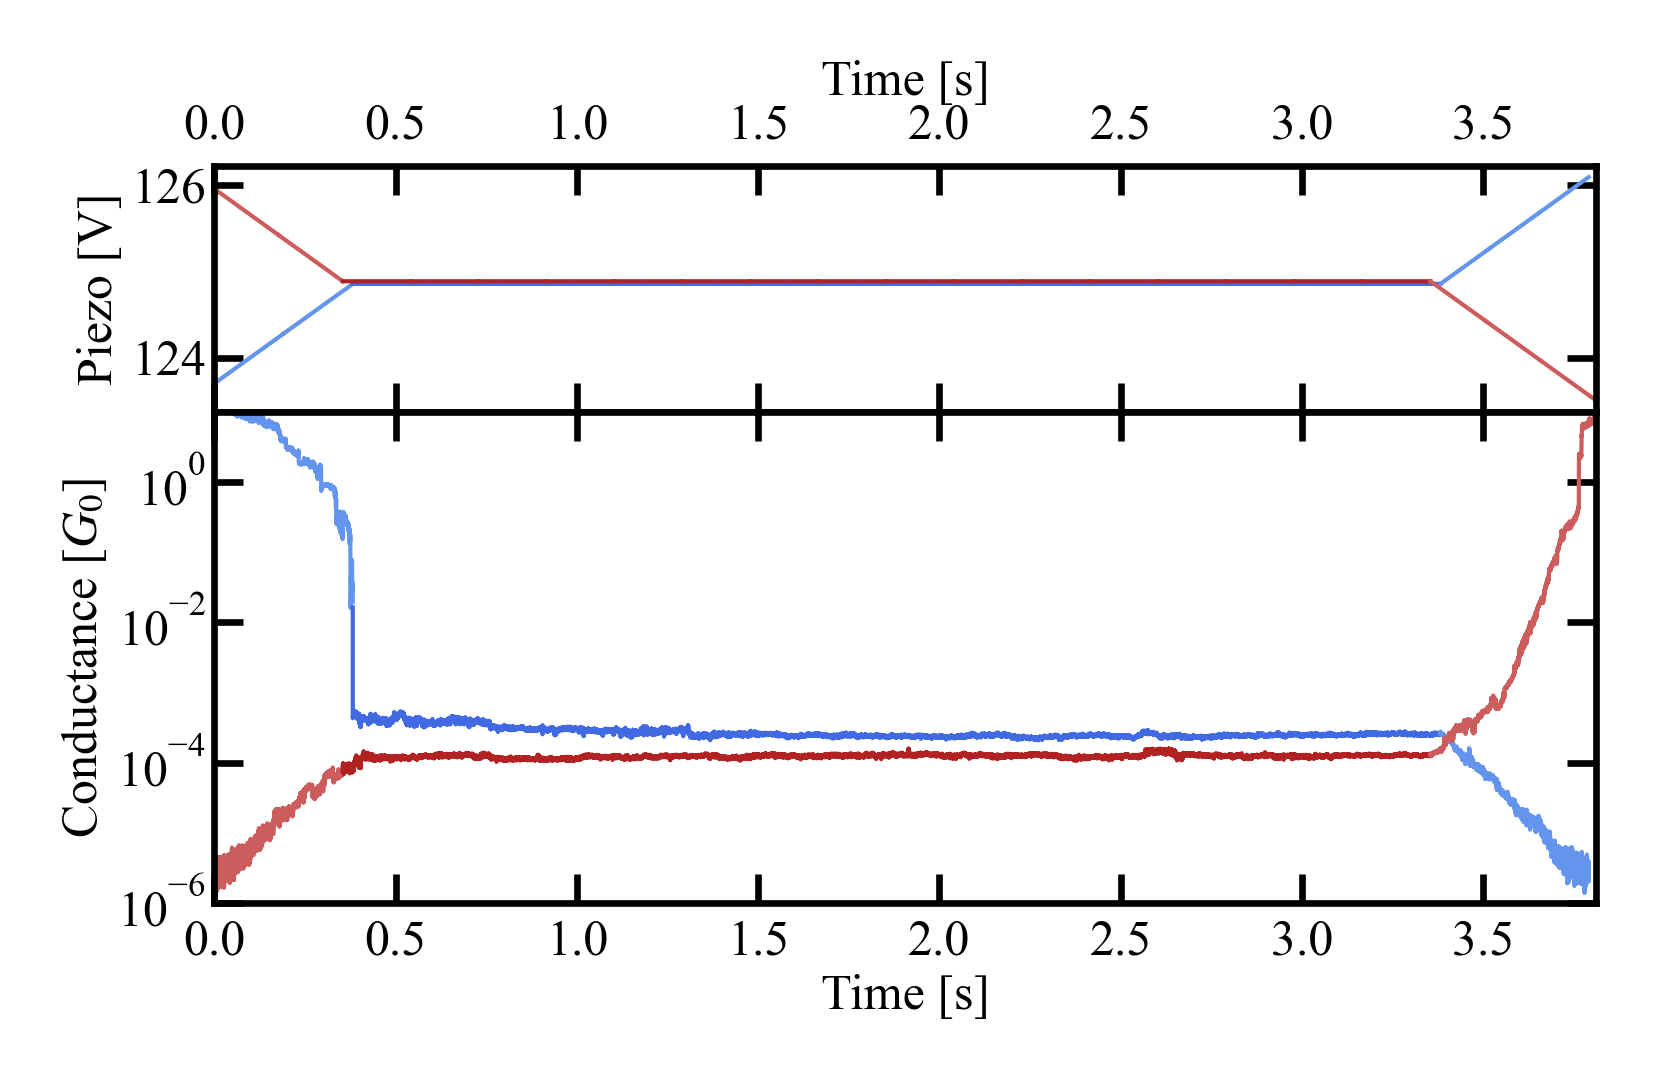

In [9]:
ax_piezo, ax_combed = plots.plot_measurement_scheme_combed(trace_pair, hold_trace, home_folder, smoothing=10,
                                                           direction='pull',
                                                           main_colors=('cornflowerblue', 'indianred'),
                                                           accent_colors=('royalblue', 'firebrick'),
                                                           ylim=(1e-6, 10),
                                                           add_vlines_for_hold=False,
                                                           fig_size=utils.cm2inch(7.8, 3.9),
                                                           save_fig=False,
                                                           to_axes=None)

ax_piezo, ax_combed = plots.plot_measurement_scheme_combed(trace_pair, hold_trace, home_folder, smoothing=10,
                                                           direction='push',
                                                           main_colors=('cornflowerblue', 'indianred'),
                                                           accent_colors=('mediumblue', 'firebrick'),
                                                           ylim=(1e-6, 10),
                                                           add_vlines_for_hold=False,
                                                           fig_size=utils.cm2inch(7.8, 3.9),
                                                           save_fig=False,
                                                           to_axes=(ax_piezo, ax_combed))

# Temporal noise analysis

In [17]:
hold_trace.hold_conductance_pull[:150000].shape

(149998,)

In [18]:
win_size=1001
step_size=100

len(hold_trace.hold_conductance_pull)//step_size

1499

In [19]:
utils.even_ext(hold_trace.hold_conductance_pull, win_size//2)

array([0.00044732, 0.00044296, 0.00046319, ..., 0.00025835, 0.00026175,
       0.00026299])

In [20]:
hold_trace.time_axis_pull = np.arange(start=0, stop=hold_trace.hold_current_pull.shape[0]/hold_trace.sample_rate,
                                      step=1/hold_trace.sample_rate)

hold_trace.time_axis_push = np.arange(start=0, stop=hold_trace.hold_current_push.shape[0]/hold_trace.sample_rate,
                                      step=1/hold_trace.sample_rate)

In [21]:
count_len_pull = np.zeros(did_not_break_pull.shape[0])
count_len_push = np.zeros(did_not_break_push.shape[0])

In [23]:
for i, trace in enumerate(tqdm(did_not_break_pull)):
    hold_trace = HoldTrace(trace, load_from=home_folder, bias_offset=0,
                           r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
    count_len_pull[i] = hold_trace.hold_conductance_pull.shape[0]
    
for i, trace in enumerate(tqdm(did_not_break_push)):
    hold_trace = HoldTrace(trace, load_from=home_folder, bias_offset=0,
                           r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
    count_len_push[i] = hold_trace.hold_conductance_push.shape[0]

  0%|          | 0/5609 [00:00<?, ?it/s]

  0%|          | 0/14498 [00:00<?, ?it/s]

In [24]:
np.unique(count_len_pull, return_counts=True)

(array([149975., 149978., 149981., 149982., 149983., 149984., 149985.,
        149986., 149987., 149988., 149989., 149990., 149991., 149992.,
        149993., 149994., 149995., 149996., 149997., 149998., 149999.,
        150000., 150001., 150002.]),
 array([   1,    2,    3,    4,    1,    4,    9,    8,   13,    5,    7,
          18,   12,   18,   26,   37,   56,  102,  203,  390,  652,  950,
        1717, 1371], dtype=int64))

In [25]:
np.unique(count_len_pull)//step_size

array([1499., 1499., 1499., 1499., 1499., 1499., 1499., 1499., 1499.,
       1499., 1499., 1499., 1499., 1499., 1499., 1499., 1499., 1499.,
       1499., 1499., 1499., 1500., 1500., 1500.])

In [26]:
num_of_wins = int(min(np.unique(count_len_pull))//step_size)
num_of_wins

1499

In [ ]:
areas_pull = np.zeros((did_not_break_pull.shape[0], num_of_wins))
cond_avg_in_win_pull = np.zeros((did_not_break_pull.shape[0], num_of_wins))
# psd_all = []
wrong_ind = []

for ind, trace in enumerate(tqdm(did_not_break_pull)):
    # load trace
    hold_trace = HoldTrace(trace, load_from=home_folder, bias_offset=0,
                           r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
    hold_trace.time_axis_pull = np.arange(start=0, stop=hold_trace.hold_current_pull.shape[0]/hold_trace.sample_rate,
                                          step=1/hold_trace.sample_rate)
    # mirror extension
    mirr_ext_plat_time_pull = utils.even_ext(hold_trace.time_axis_pull[:150000], n=win_size//2)
    mirr_ext_plat_cond_pull = utils.even_ext(hold_trace.hold_conductance_pull[:150000], n=win_size//2)

    psd_intervals = np.array([mirr_ext_plat_cond_pull[i*step_size: i*step_size+win_size]
                              for i in range(num_of_wins)])

    cond_avg_in_win_pull[ind] = np.array(list(map(utils.log_avg, psd_intervals)))
    
    if any(np.isnan(cond_avg_in_win_pull[ind])):
        wrong_ind.append(ind)
        continue
    
    fft_freqs, psd_results = scipy.signal.welch(x=psd_intervals, fs=50_000, window='hann',
                                                nperseg=win_size, noverlap=0, nfft=None,
                                                detrend=False, scaling='density', average='mean', axis=1)
#     psd_all.append(psd_results)
    
    mask = np.bitwise_and(fft_freqs > 100, fft_freqs < 1000)

    for i, psd_result in enumerate(psd_results):
        areas_pull[ind, i] = scipy.integrate.trapz(psd_result[mask], x=fft_freqs[mask])

# psd_all = np.array(psd_all)

  0%|          | 0/5609 [00:00<?, ?it/s]

In [72]:
print(cond_avg_in_win_pull.shape)
print(areas_pull.shape)
print(wrong_ind.shape)

(5609, 1499)
(5609, 1499)


In [74]:
# cond_avg_in_win_pull = np.delete(cond_avg_in_win_pull, wrong_ind, axis=0)
# areas_pull = np.delete(areas_pull, wrong_ind, axis=0)

In [75]:
# print(cond_avg_in_win_pull.shape)
# print(areas_pull.shape)

(4495, 1499)
(4495, 1499)


In [78]:
n_pull = np.zeros(psd_intervals.shape[0])

multiplier = utils.Constants.r0 ** 2 / (trace_pair.bias_mv/1000) ** 2
noise_power_pull = areas_pull  # g0**2
conductance_noise_pull = np.sqrt(areas_pull) / cond_avg_in_win_pull  # unitless

N = np.linspace(0.5, 4, num=1000)
for interval in tqdm(range(psd_intervals.shape[0])):
    pull_corr = np.zeros_like(N)
    for i, n in enumerate(N):
        pull_corr[i] = utils.calc_correlation(np.log10(noise_power_pull[:, interval]/cond_avg_in_win_pull[:, interval]**n),
                                              np.log10(cond_avg_in_win_pull[:, interval]))
        
    n_pull[interval] = N[abs(pull_corr) == min(abs(pull_corr))][0]

  0%|          | 0/1499 [00:00<?, ?it/s]

In [79]:
relax_times_pull = np.load(home_folder.joinpath('results/relax_times_pull.npy'))
relax_times_push = np.load(home_folder.joinpath('results/relax_times_push.npy'))
H_pull = np.load(home_folder.joinpath('results/H_pull.npy'))
H_push = np.load(home_folder.joinpath('results/H_push.npy'))
x_mesh = np.load(home_folder.joinpath('results/x_mesh.npy'))
y_mesh = np.load(home_folder.joinpath('results/y_mesh.npy'))

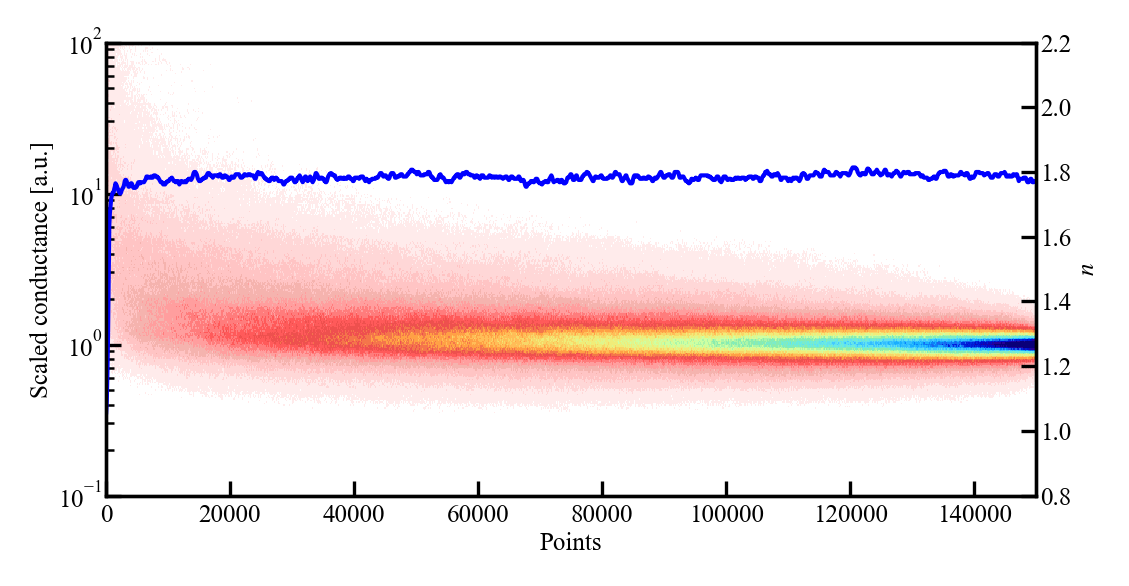

In [98]:
fig, ax = plt.subplots(1, dpi=300, figsize=(4, 2))
parx=ax.twinx()

im_norm_pull = ax.pcolormesh(x_mesh, y_mesh, H_pull, cmap=utils.cmap_geo32, vmax=3000)
# im_norm_push = ax_relax_push.pcolormesh(x_mesh, y_mesh, H_push, cmap=utils.cmap_geo32, vmax=10000)

ax.set_yscale('log')
ax.set_ylim(1e-1, 1e2)
ax.set_ylabel(r'Scaled conductance [a.u.]')
ax.set_xlabel(r'Points')

parx.plot(hold_trace.time_axis_pull[::step_size][:-1]*50_000, n_pull, lw=1, c='blue')
parx.set_ylim(0.8, 2.2)
parx.set_ylabel(r'$n$')
# parx.scatter(piez_pull[0][::step_size][65], n_pull[65], c='r', s=1)

parx.axhline(2.2, ls='--', lw=0.5, c='k')

In [90]:
hold_trace.time_axis_pull[::step_size][:-1]*50_000

array([0.000e+00, 1.000e+02, 2.000e+02, ..., 1.496e+05, 1.497e+05,
       1.498e+05])

In [87]:
max(n_pull)

1.8138138138138138

In [ ]:
did_not_break_pull[wrong_ind]

In [101]:
which_trace=np.random.choice(did_not_break_pull[wrong_ind])
print(which_trace)

hold_trace = HoldTrace(which_trace, load_from=home_folder, bias_offset=0,
                       r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)
hold_trace.analyse_hold_trace(num_of_fft=1)

11217


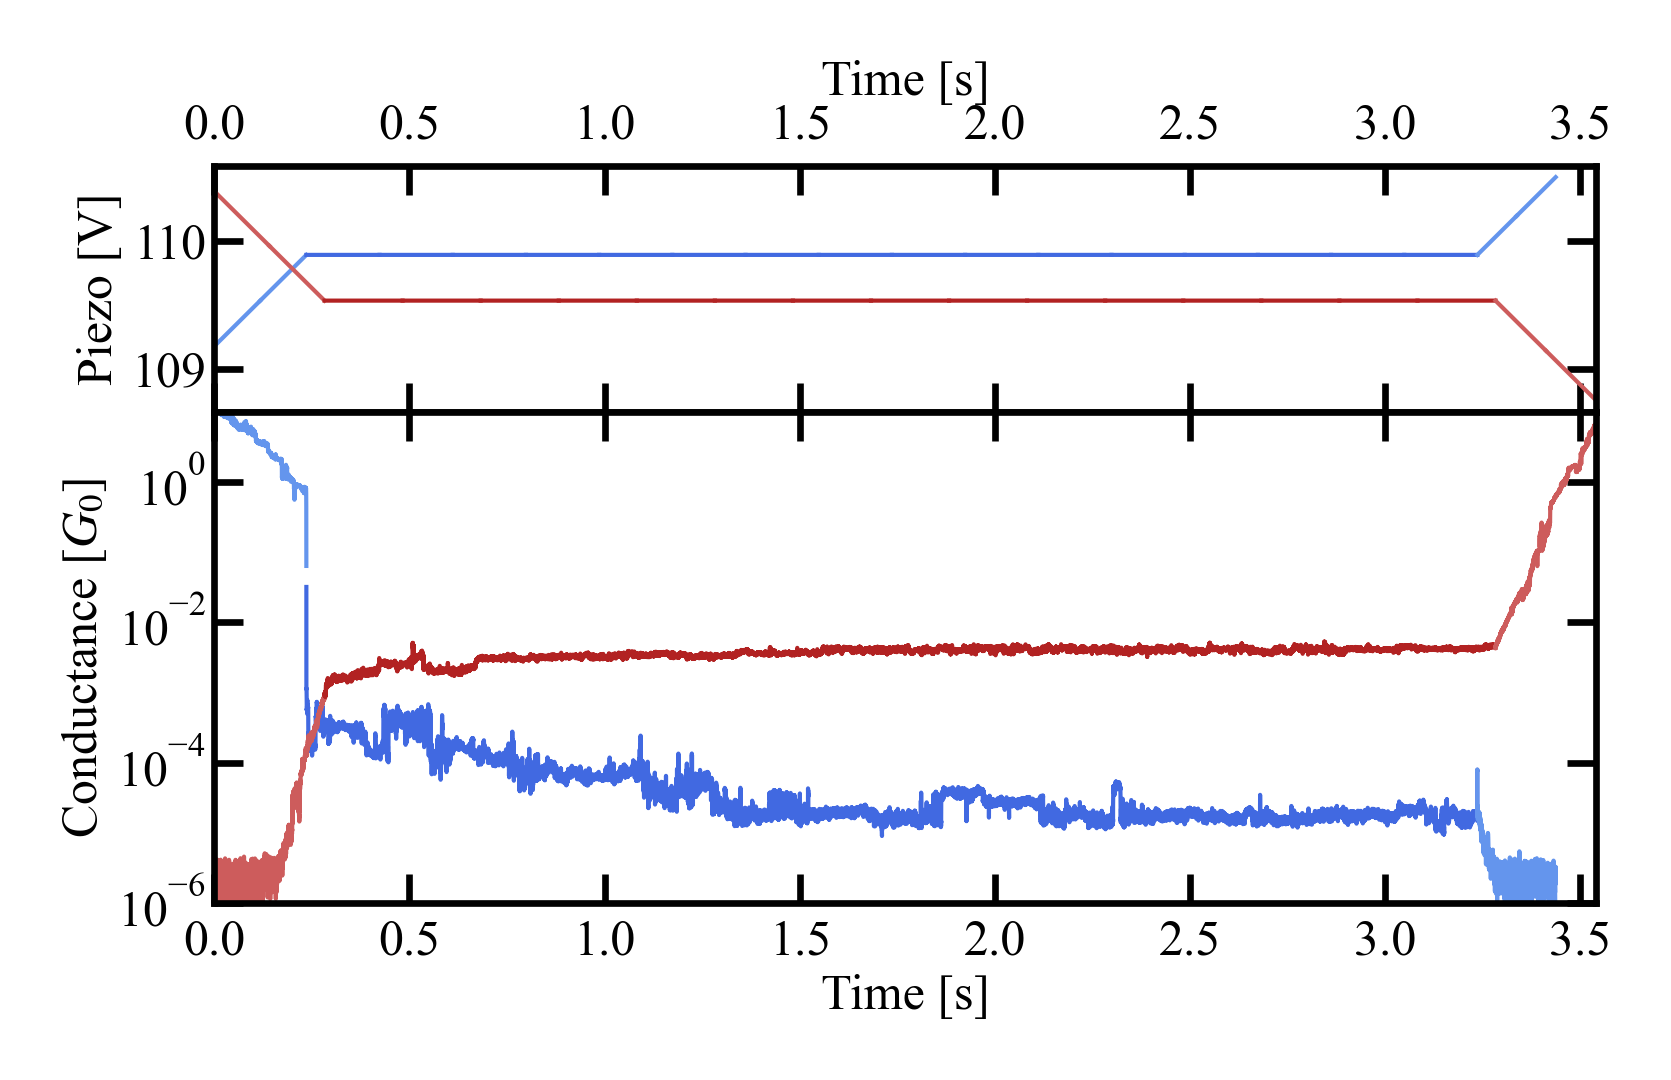

In [103]:
ax_piezo, ax_combed = plots.plot_measurement_scheme_combed(trace_pair, hold_trace, home_folder, smoothing=10,
                                                           direction='pull',
                                                           main_colors=('cornflowerblue', 'indianred'),
                                                           accent_colors=('royalblue', 'firebrick'),
                                                           ylim=(1e-6, 10),
                                                           add_vlines_for_hold=False,
                                                           fig_size=utils.cm2inch(7.8, 3.9),
                                                           save_fig=False,
                                                           to_axes=None)

ax_piezo, ax_combed = plots.plot_measurement_scheme_combed(trace_pair, hold_trace, home_folder, smoothing=10,
                                                           direction='push',
                                                           main_colors=('cornflowerblue', 'indianred'),
                                                           accent_colors=('mediumblue', 'firebrick'),
                                                           ylim=(1e-6, 10),
                                                           add_vlines_for_hold=False,
                                                           fig_size=utils.cm2inch(7.8, 3.9),
                                                           save_fig=False,
                                                           to_axes=(ax_piezo, ax_combed))

In [102]:
hold_trace.noise_power_pull

array([1.47273156e-11])

In [105]:
np.where(np.isnan(hold_trace.hold_conductance_pull))

(array([], dtype=int64),)

In [127]:
mirr_ext_plat_cond_pull = utils.even_ext(hold_trace.hold_conductance_pull[:150000], n=win_size//2)

psd_intervals = np.array([mirr_ext_plat_cond_pull[i*step_size: i*step_size+win_size]
                          for i in range(num_of_wins)])

cond_avg = np.array(list(map(utils.log_avg, psd_intervals)))

In [128]:
np.where(np.isnan(cond_avg))

(array([ 470,  471,  472,  473,  474,  475,  476,  477,  478,  479,  536,
         537,  538,  539,  540,  541,  542,  543,  544,  545,  546,  547,
         548,  549,  550,  551,  552,  553,  554,  555,  556,  557,  558,
         559,  560,  561,  562,  563,  564,  565,  566,  567,  568,  569,
         570,  575,  576,  577,  578,  579,  580,  581,  582,  583,  584,
         585,  586,  587,  588,  589,  590,  591,  592,  593,  594,  595,
         596,  597,  598,  599,  600,  601,  602,  639,  640,  641,  642,
         643,  644,  645,  646,  647,  648,  649,  650,  651,  652,  653,
         654,  655,  656,  657,  658,  659,  660,  661,  662,  663,  664,
         665,  725,  726,  727,  728,  729,  730,  731,  732,  733,  734,
         735,  736,  737,  738,  739,  740,  741,  742,  743,  744,  745,
         746,  747,  748,  749,  750,  751,  752,  753,  754,  755,  756,
         757,  758,  759,  760,  761,  762,  763,  764,  765,  766,  767,
         768,  769,  770,  771,  772, 

In [137]:
psd_intervals[1123][np.where(psd_intervals[1123] < 0)[0][0]-1]

2.6290918972292622e-05

***

# Old analysis

In [10]:
conductance_stat_pull = pd.read_csv(home_folder.joinpath('results/conductance_stats_pull_1.csv'), skiprows=[1])
conductance_stat_push = pd.read_csv(home_folder.joinpath('results/conductance_stats_push_1.csv'), skiprows=[1])

In [11]:
stop_bins_pull, stop_single_hist_pull = utils.calc_hist_1d_single(data=conductance_stat_pull['G_stop'],
                                                                  xrange=(1e-5, 1e-1),
                                                                  xbins_num=100,
                                                                  log_scale=True)

stop_bins_push, stop_single_hist_push = utils.calc_hist_1d_single(data=conductance_stat_push['G_stop'],
                                                                  xrange=(1e-5, 1e-1),
                                                                  xbins_num=100,
                                                                  log_scale=True)

begin_bins_pull, begin_single_hist_pull = utils.calc_hist_1d_single(data=conductance_stat_pull['G_hold'],
                                                                    xrange=(1e-5, 1e-1),
                                                                    xbins_num=100,
                                                                    log_scale=True)

begin_bins_push, begin_single_hist_push = utils.calc_hist_1d_single(data=conductance_stat_push['G_hold'],
                                                                    xrange=(1e-5, 1e-1),
                                                                    xbins_num=100,
                                                                    log_scale=True)

end_bins_pull, end_single_hist_pull = utils.calc_hist_1d_single(data=conductance_stat_pull['G_avg'],
                                                                xrange=(1e-5, 1e-1),
                                                                xbins_num=100,
                                                                log_scale=True)

end_bins_push, end_single_hist_push = utils.calc_hist_1d_single(data=conductance_stat_push['G_avg'],
                                                                xrange=(1e-5, 1e-1),
                                                                xbins_num=100,
                                                                log_scale=True)

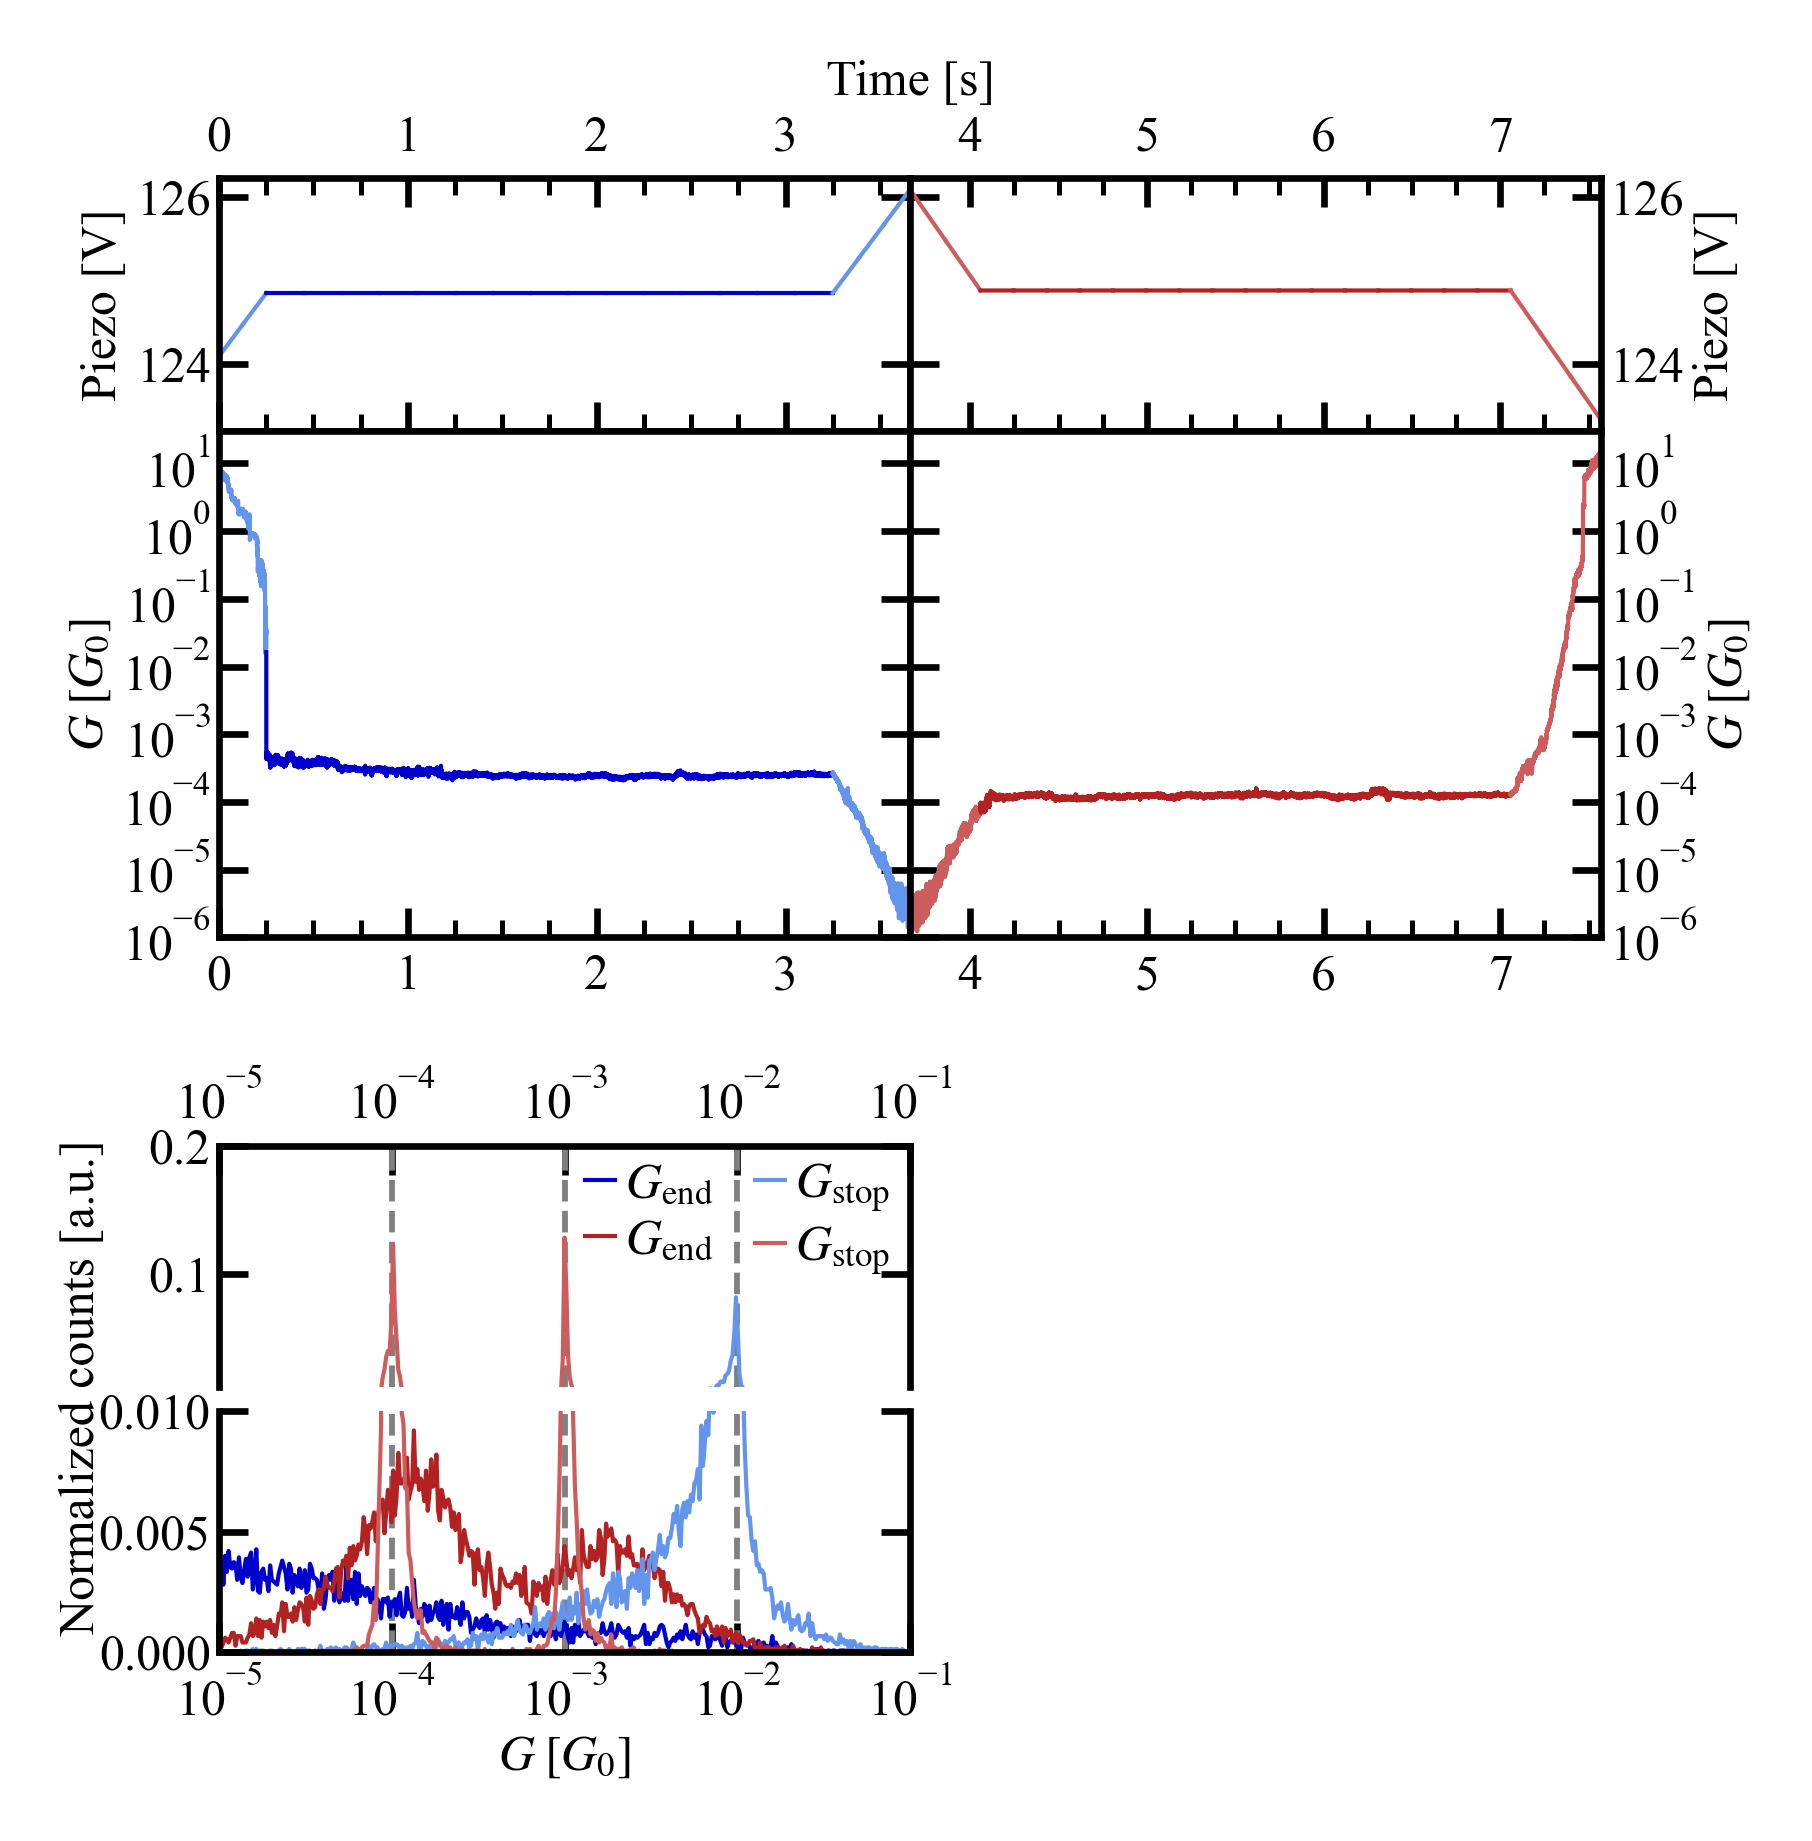

In [13]:
fig = plt.figure(figsize=utils.cm2inch(7.8, 7.8), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(3, 2),
                           figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0.2, hspace=0.33)

gs_top = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, height_ratios=(1, 2),
                                          subplot_spec=gs_total[0],
                                          wspace=0, hspace=0)

gs_bottom = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, height_ratios=(1, 1),
                                             subplot_spec=gs_total[1],
                                             wspace=0, hspace=0.1)


ax_piezo_pull = fig.add_subplot(gs_top[0, 0])
ax_piezo_push = fig.add_subplot(gs_top[0, 1], sharey=ax_piezo_pull)
ax_cond_pull = fig.add_subplot(gs_top[1, 0], sharex=ax_piezo_pull)
ax_cond_push = fig.add_subplot(gs_top[1, 1], sharey=ax_cond_pull, sharex=ax_piezo_push)

ax_top_hist = fig.add_subplot(gs_bottom[0, 0])
ax_bottom_hist = fig.add_subplot(gs_bottom[1, 0], sharex=ax_top_hist)

ax_piezo_pull, ax_cond_pull, ax_piezo_push, ax_cond_push = plots.plot_measurement_scheme_combed_both(
                                                                   trace_pair=trace_pair, hold_trace=hold_trace,
                                                                   home_folder=home_folder, smoothing=10,
                                                                   main_colors=('cornflowerblue', 'indianred'),
                                                                   accent_colors=('mediumblue', 'firebrick'),
                                                                   add_vlines_for_hold=True,
                                                                   save_fig=False,
                                                                   to_axes = (ax_piezo_pull, ax_cond_pull, ax_piezo_push, ax_cond_push))

ax_piezo_push.yaxis.set_label_position('right')
ax_piezo_push.yaxis.tick_right()
ax_piezo_push.yaxis.set_ticks_position('both')

ax_cond_push.yaxis.set_label_position('right')
ax_cond_push.yaxis.tick_right()
ax_cond_push.yaxis.set_ticks_position('both')

# ax_piezo_pull.set_xticks(np.arange(0, 4, 1), minor=False)
# ax_piezo_push.set_xticks(np.arange(0, 4, 1), minor=False)

# ax_piezo_pull.set_xticks(np.arange(0.25, 4, 0.25), minor=True, alpha=0.5)
# ax_piezo_push.set_xticks(np.arange(0.25, 4, 0.25), minor=True, alpha=0.5)

ax_cond_pull.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))

ax_top_hist.set_xscale('log')
ax_bottom_hist.set_xscale('log')

ax_top_hist.yaxis.set_ticks_position('both')
ax_bottom_hist.yaxis.set_ticks_position('both')

ax_top_hist.spines['bottom'].set_visible(False)
ax_bottom_hist.spines['top'].set_visible(False)

# ax_top_hist.xaxis.set_label_position('top')
ax_top_hist.xaxis.tick_top()
# ax_top_hist.xaxis.set_ticks_position('both')

ax_bottom_hist.axvline(1e-2, c='grey', ls='--', lw=0.7)
ax_bottom_hist.axvline(1e-3, c='grey', ls='--', lw=0.7)
ax_bottom_hist.axvline(1e-4, c='grey', ls='--', lw=0.7)

ax_top_hist.axvline(1e-2, c='grey', ls='--', lw=0.7)
ax_top_hist.axvline(1e-3, c='grey', ls='--', lw=0.7)
ax_top_hist.axvline(1e-4, c='grey', ls='--', lw=0.7)

# ax_top_hist.plot(begin_bins_pull, begin_single_hist_pull/len(conductance_stat_pull['G_hold']), c='mediumblue', lw=0.7)
# ax_top_hist.plot(begin_bins_push, begin_single_hist_push/len(conductance_stat_push['G_hold']), c='darkred', lw=0.7)

ax_top_hist.plot(end_bins_pull, end_single_hist_pull/len(conductance_stat_pull['G_hold']), c='mediumblue', lw=0.5,
                label=r'$G_\mathrm{end}$')
ax_top_hist.plot(end_bins_push, end_single_hist_push/len(conductance_stat_push['G_hold']), c='firebrick', lw=0.5,
                label=r'$G_\mathrm{end}$')

ax_top_hist.plot(stop_bins_pull, stop_single_hist_pull/len(conductance_stat_pull['G_stop']), c='cornflowerblue', lw=0.5,
                label=r'$G_\mathrm{stop}$')
ax_top_hist.plot(stop_bins_push, stop_single_hist_push/len(conductance_stat_push['G_stop']), c='indianred', lw=0.5,
                label=r'$G_\mathrm{stop}$')

# ax_bottom_hist.plot(begin_bins_pull, begin_single_hist_pull/len(conductance_stat_pull['G_hold']), c='mediumblue', lw=0.7)
# ax_bottom_hist.plot(begin_bins_push, begin_single_hist_push/len(conductance_stat_push['G_hold']), c='darkred', lw=0.7)

ax_bottom_hist.plot(end_bins_pull, end_single_hist_pull/len(conductance_stat_pull['G_hold']), c='mediumblue', lw=0.5,)
ax_bottom_hist.plot(end_bins_push, end_single_hist_push/len(conductance_stat_push['G_hold']), c='firebrick', lw=0.5,)

ax_bottom_hist.plot(stop_bins_pull, stop_single_hist_pull/len(conductance_stat_pull['G_stop']), c='cornflowerblue', lw=0.5,)
ax_bottom_hist.plot(stop_bins_push, stop_single_hist_push/len(conductance_stat_push['G_stop']), c='indianred', lw=0.5,)


ax_top_hist.legend(loc='upper right', ncol=2, mode="expand",
                   bbox_to_anchor=(0.5, 1, 0.5, .02),
                   borderaxespad=0.,
                   handlelength=0.6, handletextpad=0.2, labelspacing=0.2,
                   fontsize=6, frameon=False)

ax_top_hist.set_xlim(1e-5, 1e-1)
ax_top_hist.set_ylim(0.012, 0.2)
ax_bottom_hist.set_ylim(0, 0.01)

ax_cond_pull.set_ylabel(r'$G\;[G_{0}]$')
ax_cond_push.set_ylabel(r'$G\;[G_{0}]$')

ax_cond_pull.set_ylim(1e-6, 30)

# ax_top_hist.set_xlabel(r'G [$G_{0}$]')
ax_bottom_hist.set_xlabel(r'$G\;[G_{0}]$')

ax_top_hist.text(1.2e-6, 0.012, 'Normalized counts [a.u.]', rotation='vertical', va='center', size=rcParams['axes.labelsize'])
ax_top_hist.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))

# plt.savefig(home_folder.joinpath(f'results/article/fig_1.svg'), bbox_inches='tight')

In [10]:
pull_conds = list()
count=0

if 'H_pull' in locals():
    del(H_pull)
    
if 'H_push' in locals():
    del(H_push)
    
relax_times_pull = []
relax_times_push = []
    
xrange=(0, 150_000)
yrange=(1e-2, 100)
xbins = np.linspace(xrange[0], xrange[1], num=15_000)  # ~for each trace 10 points in each horizontal bin

num_of_decs = np.log10(yrange[1]) - np.log10(yrange[0])
ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(100 * num_of_decs), base=10)

for trace_num in tqdm(pull_traces, desc="Processing pull traces"):
    try:
        bj_trace = TracePair(trace=trace_num, load_from=home_folder)
        hold_trace = HoldTrace(trace=trace_num, load_from=home_folder,
                               bias_offset=0, r_serial_ohm=bj_trace.R_serial,
                               sample_rate=bj_trace.sample_rate, min_step_len=0)

        h, xedges, yedges = np.histogram2d(np.arange(0, hold_trace.hold_conductance_pull.shape[0]),
                                           hold_trace.hold_conductance_pull/hold_trace.hold_conductance_pull[-1],
                                           bins=[xbins, ybins])
        x_mesh, y_mesh = np.meshgrid(xedges, yedges)

        if 'H_pull' in locals():
            H_pull += h.T
        else:
            H_pull = h.T

        count += 1
        
        relax_ends_at, relax_time, relax_amount = filter_traces.measure_relaxation(hold_trace.hold_conductance_pull,
                                                                                   conductance_limit=2)
        relax_times_pull.append(relax_time)

    except KeyError:
        break
        
print(f'pull: {count}')
count = 0
        
for trace_num in tqdm(push_traces, desc="Processing push traces"):
    try:
        bj_trace = TracePair(trace=trace_num, load_from=home_folder)
        hold_trace = HoldTrace(trace=trace_num, load_from=home_folder,
                               bias_offset=0, r_serial_ohm=bj_trace.R_serial,
                               sample_rate=bj_trace.sample_rate, min_step_len=0)

        h, xedges, yedges = np.histogram2d(np.arange(0, hold_trace.hold_conductance_push.shape[0]),
                                           hold_trace.hold_conductance_push/hold_trace.hold_conductance_push[-1],
                                           bins=[xbins, ybins])
        x_mesh, y_mesh = np.meshgrid(xedges, yedges)

        if 'H_push' in locals():
            H_push += h.T
        else:
            H_push = h.T

        count += 1
        
        relax_ends_at, relax_time, relax_amount = filter_traces.measure_relaxation(hold_trace.hold_conductance_push,
                                                                                   conductance_limit=2)
        relax_times_push.append(relax_time)

    except KeyError:
        break
        
print(f'push: {count}')

bins_relax_time_pull, single_hist_relax_time_pull = utils.calc_hist_1d_single(data=relax_times_pull,
                                                                              xrange=(0, 3),
                                                                              xbins_num=30,
                                                                              log_scale=False)

bins_relax_time_push, single_hist_relax_time_push = utils.calc_hist_1d_single(data=relax_times_push,
                                                                              xrange=(0, 3),
                                                                              xbins_num=30,
                                                                              log_scale=False)

Processing pull traces:   0%|          | 0/5609 [00:00<?, ?it/s]

pull: 5609


Processing push traces:   0%|          | 0/14498 [00:00<?, ?it/s]

push: 14498


In [11]:
np.save(home_folder.joinpath('results/relax_times_pull.npy'), relax_times_pull)
np.save(home_folder.joinpath('results/relax_times_push.npy'), relax_times_push)

np.save(home_folder.joinpath('results/H_pull.npy'), H_pull)
np.save(home_folder.joinpath('results/H_push.npy'), H_push)

np.save(home_folder.joinpath('results/x_mesh.npy'), x_mesh)
np.save(home_folder.joinpath('results/y_mesh.npy'), y_mesh)

In [12]:
relax_times_pull = np.load(home_folder.joinpath('results/relax_times_pull.npy'))
relax_times_push = np.load(home_folder.joinpath('results/relax_times_push.npy'))
H_pull = np.load(home_folder.joinpath('results/H_pull.npy'))
H_push = np.load(home_folder.joinpath('results/H_push.npy'))
x_mesh = np.load(home_folder.joinpath('results/x_mesh.npy'))
y_mesh = np.load(home_folder.joinpath('results/y_mesh.npy'))

In [13]:
bins_relax_time_pull, single_hist_relax_time_pull = utils.calc_hist_1d_single(data=relax_times_pull,
                                                                              xrange=(0, 3),
                                                                              xbins_num=60,
                                                                              log_scale=False)

bins_relax_time_push, single_hist_relax_time_push = utils.calc_hist_1d_single(data=relax_times_push,
                                                                              xrange=(0, 3),
                                                                              xbins_num=60,
                                                                              log_scale=False)

In [14]:
np.sum(H_pull, axis=0)

array([43887., 40535., 40982., ..., 56079., 55835., 55041.])

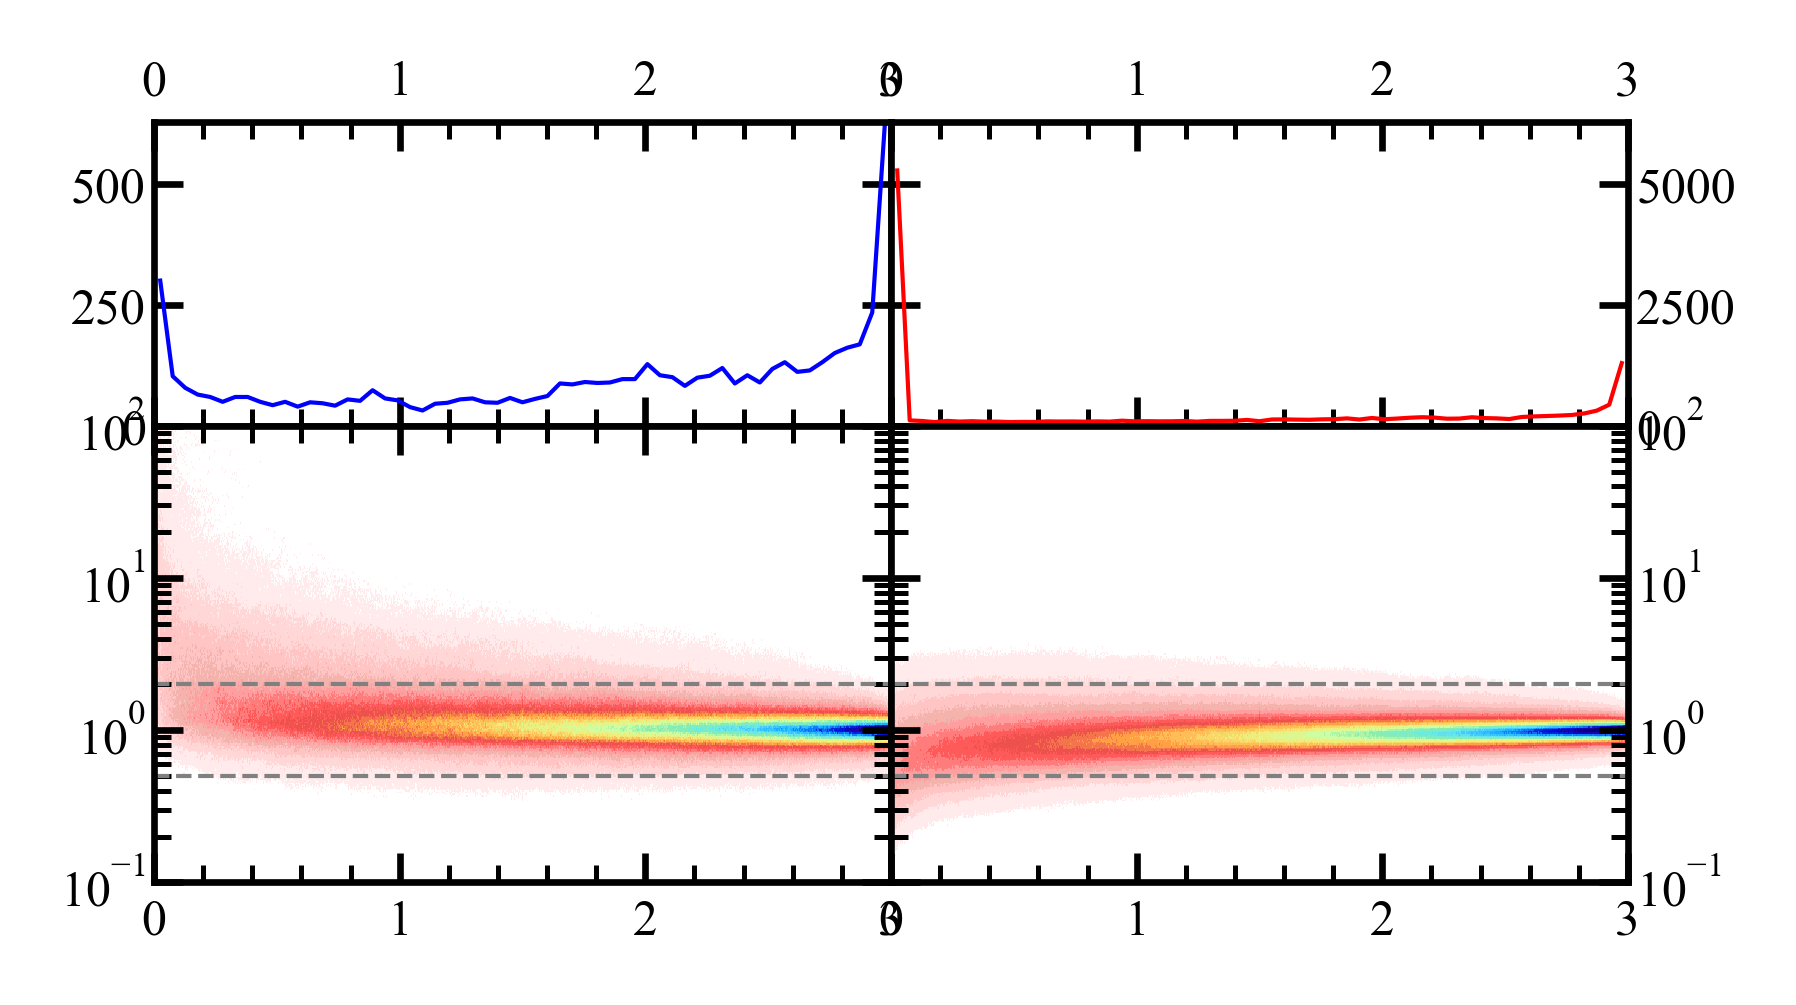

In [15]:
fig = plt.figure(figsize=utils.cm2inch(7.8, 4.6), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=(2, 3),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0, hspace=0)

# gs_2d_scat_hist = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2,
#                                                    subplot_spec=gs_total[1, 0], wspace=0, hspace=0)

# gs_relax_2d = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1,
#                                                subplot_spec=gs_total[:, 1], wspace=0, hspace=0)

ax_relax_time_pull = fig.add_subplot(gs_total[0, 0])
ax_relax_time_push = fig.add_subplot(gs_total[0, 1])
ax_relax_pull = fig.add_subplot(gs_total[1, 0])
ax_relax_push = fig.add_subplot(gs_total[1, 1], sharey=ax_relax_pull)

ax_relax_time_pull.xaxis.tick_top()
ax_relax_time_pull.xaxis.set_label_position('top')
ax_relax_time_pull.xaxis.set_ticks_position('both')
ax_relax_time_pull.yaxis.set_ticks_position('both')

ax_relax_time_push.xaxis.tick_top()
ax_relax_time_push.xaxis.set_label_position('top')
ax_relax_time_push.xaxis.set_ticks_position('both')

ax_relax_time_push.yaxis.tick_right()
ax_relax_time_push.yaxis.set_label_position('right')
ax_relax_time_push.yaxis.set_ticks_position('both')

ax_relax_pull.xaxis.set_ticks_position('both')
ax_relax_pull.yaxis.set_ticks_position('both')

ax_relax_push.yaxis.tick_right()
ax_relax_push.yaxis.set_label_position('right')
ax_relax_push.yaxis.set_ticks_position('both')

ax_relax_time_pull.plot(bins_relax_time_pull, single_hist_relax_time_pull, lw=0.5, c='blue')
ax_relax_time_push.plot(bins_relax_time_push, single_hist_relax_time_push, lw=0.5, c='red')

im_norm_pull = ax_relax_pull.pcolormesh(x_mesh, y_mesh, H_pull, cmap=utils.cmap_geo32, vmax=3000)
im_norm_push = ax_relax_push.pcolormesh(x_mesh, y_mesh, H_push, cmap=utils.cmap_geo32, vmax=10000)

ax_relax_pull.set_yscale('log')
ax_relax_pull.set_ylim(1e-1, 1e2)
ax_relax_push.set_yscale('log')

ax_relax_time_pull.set_ylim(0, 630)
ax_relax_time_pull.set_xlim(0, 3)
ax_relax_time_pull.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_relax_time_pull.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))

ax_relax_time_push.set_ylim(0, 6300)
ax_relax_time_push.set_xlim(0, 3)
ax_relax_time_push.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_relax_time_push.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))

ax_relax_pull.set_xlim(0, 150_000)
ax_relax_pull.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
ax_relax_pull.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
ax_relax_pull.set_xticklabels(np.arange(start=0, stop=4, step=1))

ax_relax_push.set_xlim(0, 150_000)
ax_relax_push.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
ax_relax_push.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
ax_relax_push.set_xticklabels(np.arange(start=0, stop=4, step=1))

ax_relax_pull.axhline(2, lw=0.5, ls='--', c='grey')
ax_relax_pull.axhline(0.5, lw=0.5, ls='--', c='grey')
ax_relax_push.axhline(2, lw=0.5, ls='--', c='grey')
ax_relax_push.axhline(0.5, lw=0.5, ls='--', c='grey')

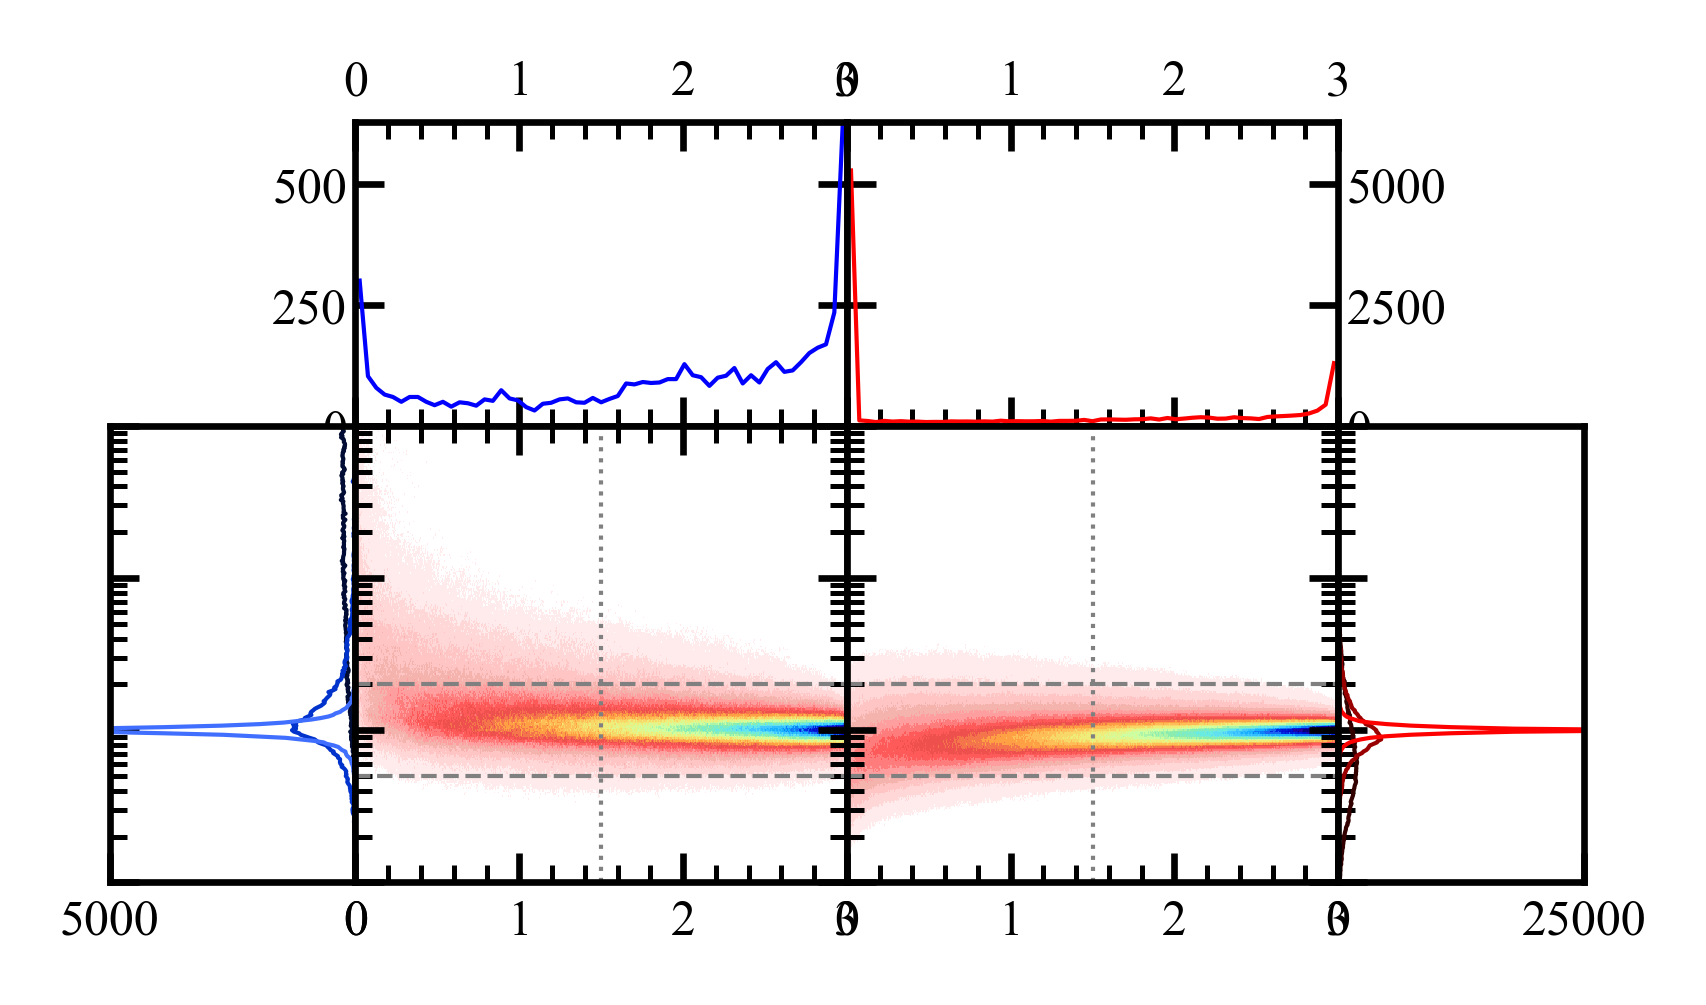

In [16]:
fig = plt.figure(figsize=utils.cm2inch(7.8, 4.6), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=4, height_ratios=(2, 3), width_ratios=(1, 2, 2, 1),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0, hspace=0)

# gs_2d_scat_hist = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2,
#                                                    subplot_spec=gs_total[1, 0], wspace=0, hspace=0)

# gs_relax_2d = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1,
#                                                subplot_spec=gs_total[:, 1], wspace=0, hspace=0)

ax_relax_time_pull = fig.add_subplot(gs_total[0, 1])
ax_relax_time_push = fig.add_subplot(gs_total[0, 2])
ax_relax_hist_pull = fig.add_subplot(gs_total[1, 0])
ax_relax_pull = fig.add_subplot(gs_total[1, 1], sharey=ax_relax_hist_pull)
ax_relax_push = fig.add_subplot(gs_total[1, 2], sharey=ax_relax_hist_pull)
ax_relax_hist_push = fig.add_subplot(gs_total[1, 3], sharey=ax_relax_hist_pull)

ax_relax_time_pull.xaxis.tick_top()
ax_relax_time_pull.xaxis.set_label_position('top')
ax_relax_time_pull.xaxis.set_ticks_position('both')
ax_relax_time_pull.yaxis.set_ticks_position('both')

ax_relax_time_push.xaxis.tick_top()
ax_relax_time_push.xaxis.set_label_position('top')
ax_relax_time_push.xaxis.set_ticks_position('both')

ax_relax_time_push.yaxis.tick_right()
ax_relax_time_push.yaxis.set_label_position('right')
ax_relax_time_push.yaxis.set_ticks_position('both')

ax_relax_pull.xaxis.set_ticks_position('both')
ax_relax_pull.yaxis.set_ticks_position('both')

ax_relax_push.yaxis.tick_right()
ax_relax_push.yaxis.set_label_position('right')
ax_relax_push.yaxis.set_ticks_position('both')

ax_relax_time_pull.plot(bins_relax_time_pull, single_hist_relax_time_pull, lw=0.5, c='blue')
ax_relax_time_push.plot(bins_relax_time_push, single_hist_relax_time_push, lw=0.5, c='red')

im_norm_pull = ax_relax_pull.pcolormesh(x_mesh, y_mesh, H_pull, cmap=utils.cmap_geo32, vmax=3000)
im_norm_push = ax_relax_push.pcolormesh(x_mesh, y_mesh, H_push, cmap=utils.cmap_geo32, vmax=10000)

ax_relax_pull.set_yscale('log')
ax_relax_pull.set_ylim(1e-1, 1e2)
ax_relax_push.set_yscale('log')

ax_relax_time_pull.set_ylim(0, 630)
ax_relax_time_pull.set_xlim(0, 3)
ax_relax_time_pull.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_relax_time_pull.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))

ax_relax_time_push.set_ylim(0, 6300)
ax_relax_time_push.set_xlim(0, 3)
ax_relax_time_push.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_relax_time_push.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))

ax_relax_hist_pull.plot(H_pull[:, 0], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.blues[0])
ax_relax_hist_pull.plot(H_pull[:, 7500], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.blues[2])
ax_relax_hist_pull.plot(H_pull[:, -1], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.blues[4])

ax_relax_pull.axvline(np.unique(x_mesh.flatten())[0], lw=0.5, ls='dotted', c='grey')
ax_relax_pull.axvline(np.unique(x_mesh.flatten())[7500], lw=0.5, ls='dotted', c='grey')
ax_relax_pull.axvline(np.unique(x_mesh.flatten())[-1], lw=0.5, ls='dotted', c='grey')

ax_relax_hist_push.plot(H_push[:, 0], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.reds[0])
ax_relax_hist_push.plot(H_push[:, 7500], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.reds[2])
ax_relax_hist_push.plot(H_push[:, -1], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.reds[4])

ax_relax_push.axvline(np.unique(x_mesh.flatten())[0], lw=0.5, ls='dotted', c='grey')
ax_relax_push.axvline(np.unique(x_mesh.flatten())[7500], lw=0.5, ls='dotted', c='grey')
ax_relax_push.axvline(np.unique(x_mesh.flatten())[-1], lw=0.5, ls='dotted', c='grey')

ax_relax_hist_pull.set_xlim(5_000, 0)
ax_relax_hist_push.set_xlim(0, 25_000)


ax_relax_pull.set_yticklabels([])
ax_relax_push.set_yticklabels([])

ax_relax_pull.set_xlim(0, 150_000)
ax_relax_pull.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
ax_relax_pull.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
ax_relax_pull.set_xticklabels(np.arange(start=0, stop=4, step=1))

ax_relax_push.set_xlim(0, 150_000)
ax_relax_push.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
ax_relax_push.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
ax_relax_push.set_xticklabels(np.arange(start=0, stop=4, step=1))

ax_relax_pull.axhline(2, lw=0.5, ls='--', c='grey')
ax_relax_pull.axhline(0.5, lw=0.5, ls='--', c='grey')
ax_relax_push.axhline(2, lw=0.5, ls='--', c='grey')
ax_relax_push.axhline(0.5, lw=0.5, ls='--', c='grey')

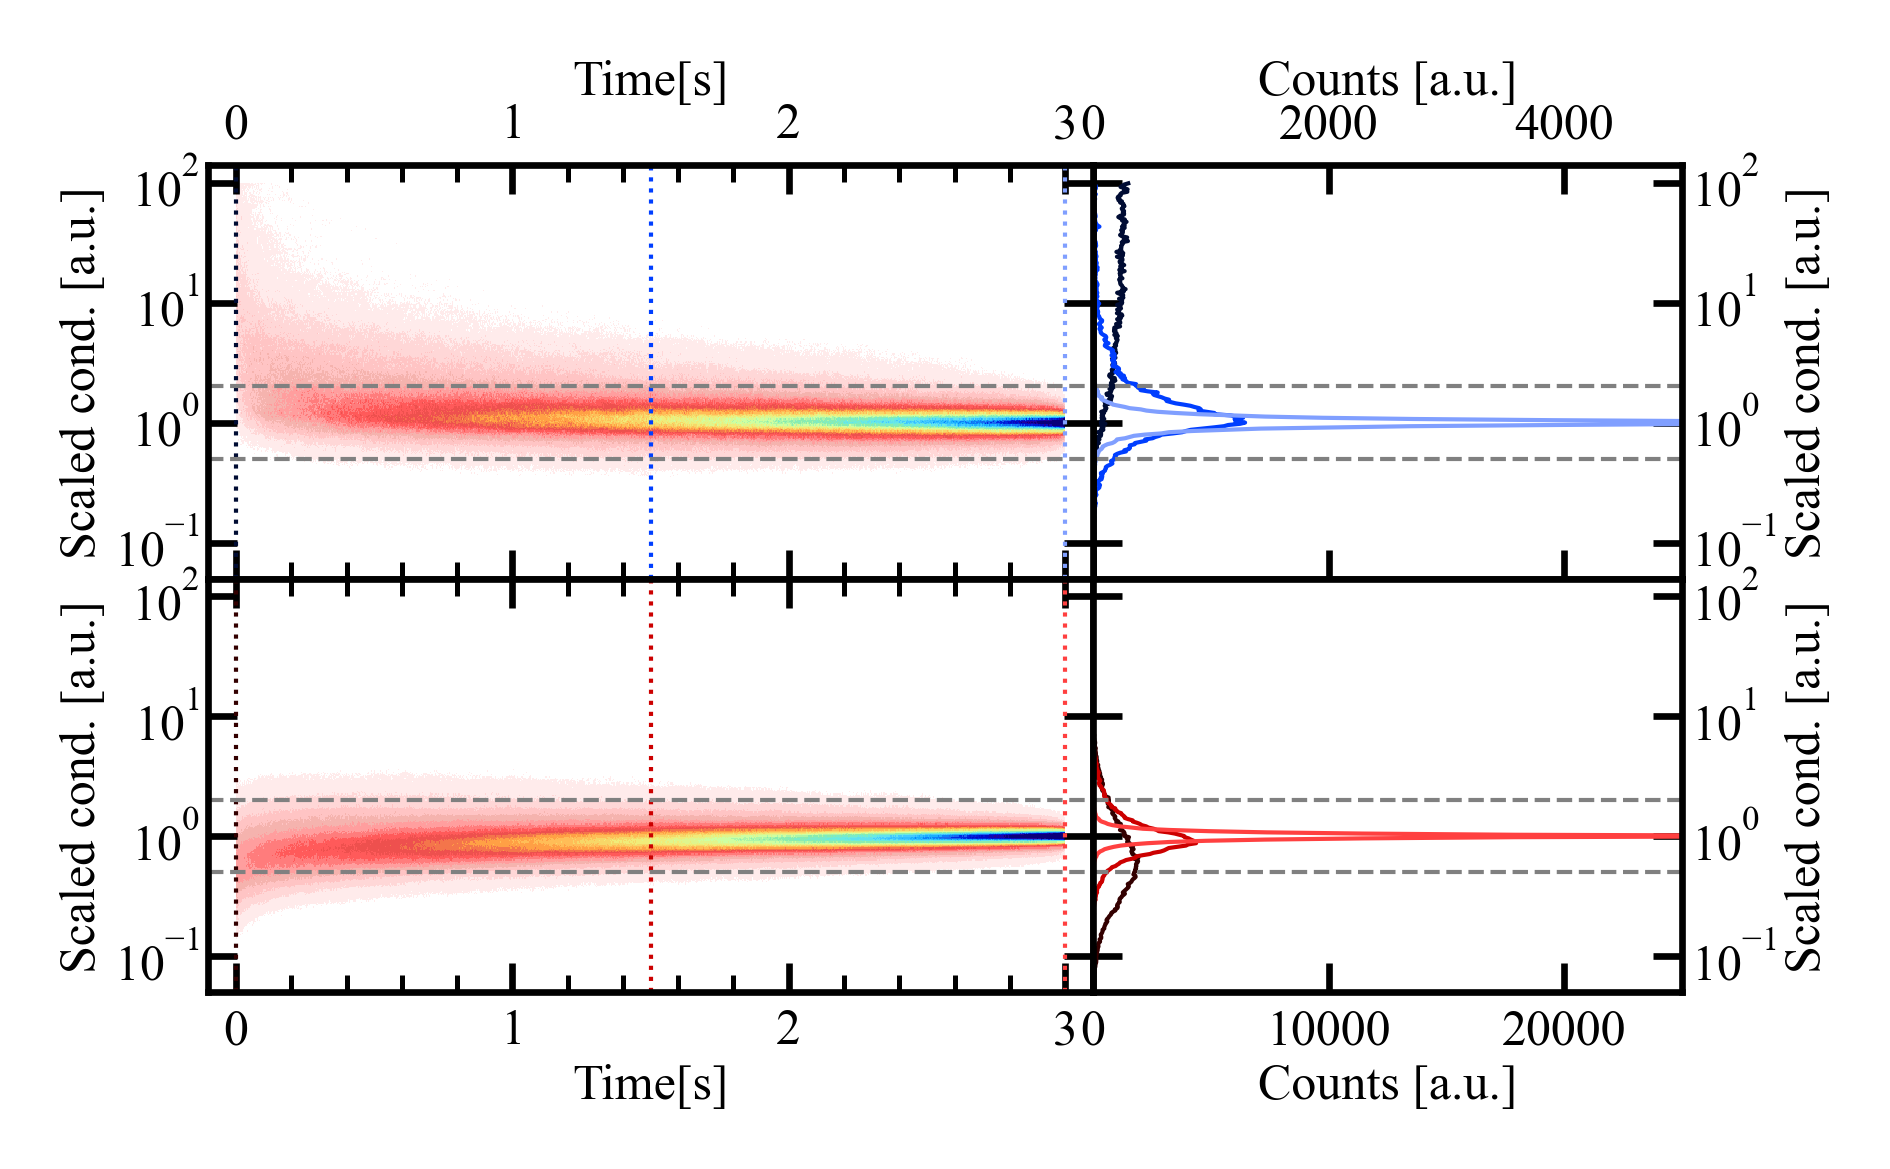

In [38]:
fig = plt.figure(figsize=utils.cm2inch(7.8, 5), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=(1, 1), width_ratios=(3, 2),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0, hspace=0)

# gs_2d_scat_hist = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2,
#                                                    subplot_spec=gs_total[1, 0], wspace=0, hspace=0)

# gs_relax_2d = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1,
#                                                subplot_spec=gs_total[:, 1], wspace=0, hspace=0)

ax_relax_hist_pull = fig.add_subplot(gs_total[0, 1])
ax_relax_pull = fig.add_subplot(gs_total[0, 0], sharey=ax_relax_hist_pull)
ax_relax_push = fig.add_subplot(gs_total[1, 0], sharex=ax_relax_pull, sharey=ax_relax_pull)
ax_relax_hist_push = fig.add_subplot(gs_total[1, 1], sharey=ax_relax_push)

ax_relax_pull.xaxis.tick_top()
ax_relax_pull.xaxis.set_label_position('top')
ax_relax_pull.xaxis.set_ticks_position('both')
ax_relax_pull.yaxis.set_ticks_position('both')

ax_relax_hist_pull.xaxis.tick_top()
ax_relax_hist_pull.xaxis.set_label_position('top')
ax_relax_hist_pull.xaxis.set_ticks_position('both')
ax_relax_hist_pull.yaxis.tick_right()
ax_relax_hist_pull.yaxis.set_label_position('right')
ax_relax_hist_pull.yaxis.set_ticks_position('both')

ax_relax_push.xaxis.set_ticks_position('both')
ax_relax_push.yaxis.set_ticks_position('both')

ax_relax_hist_push.yaxis.tick_right()
ax_relax_hist_push.yaxis.set_label_position('right')
ax_relax_hist_push.yaxis.set_ticks_position('both')

ax_relax_push.yaxis.set_ticks_position('both')

im_norm_pull = ax_relax_pull.pcolormesh(x_mesh, y_mesh, H_pull, cmap=utils.cmap_geo32, vmax=3000)
im_norm_push = ax_relax_push.pcolormesh(x_mesh, y_mesh, H_push, cmap=utils.cmap_geo32, vmax=10000)

ax_relax_pull.set_yscale('log')
ax_relax_pull.set_ylim(0.05, 1.4e2)
ax_relax_push.set_yscale('log')

ax_relax_pull.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_relax_pull.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.2), numticks=9))

ax_relax_hist_pull.plot(H_pull[:, 0], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.blues[0])
ax_relax_hist_pull.plot(H_pull[:, 7500], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.blues[3])
ax_relax_hist_pull.plot(H_pull[:, -1], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.blues[5])

ax_relax_pull.axvline(np.unique(x_mesh.flatten())[0], lw=0.5, ls='dotted', c=utils.blues[0])
ax_relax_pull.axvline(np.unique(x_mesh.flatten())[7500], lw=0.5, ls='dotted', c=utils.blues[3])
ax_relax_pull.axvline(np.unique(x_mesh.flatten())[-1], lw=0.5, ls='dotted', c=utils.blues[5])

ax_relax_hist_push.plot(H_push[:, 0], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.reds[0])
ax_relax_hist_push.plot(H_push[:, 7500], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.reds[3])
ax_relax_hist_push.plot(H_push[:, -1], utils.moving_average(np.unique(y_mesh.flatten()), 2), lw=0.5, c=utils.reds[5])

ax_relax_push.axvline(np.unique(x_mesh.flatten())[0], lw=0.5, ls='dotted', c=utils.reds[0])
ax_relax_push.axvline(np.unique(x_mesh.flatten())[7500], lw=0.5, ls='dotted', c=utils.reds[3])
ax_relax_push.axvline(np.unique(x_mesh.flatten())[-1], lw=0.5, ls='dotted', c=utils.reds[5])

ax_relax_hist_pull.set_xlim(0, 5000)
ax_relax_hist_push.set_xlim(0, 25_000)

ax_relax_pull.set_xlim(-5000, 155000)
ax_relax_pull.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
ax_relax_pull.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
ax_relax_pull.set_xticklabels(np.arange(start=0, stop=4, step=1))

ax_relax_push.set_xlim(-5000, 155000)
ax_relax_push.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
ax_relax_push.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
ax_relax_push.set_xticklabels(np.arange(start=0, stop=4, step=1))

ax_relax_pull.axhline(2, lw=0.5, ls='--', c='grey')
ax_relax_pull.axhline(0.5, lw=0.5, ls='--', c='grey')
ax_relax_push.axhline(2, lw=0.5, ls='--', c='grey')
ax_relax_push.axhline(0.5, lw=0.5, ls='--', c='grey')

ax_relax_hist_pull.axhline(2, lw=0.5, ls='--', c='grey')
ax_relax_hist_pull.axhline(0.5, lw=0.5, ls='--', c='grey')
ax_relax_hist_push.axhline(2, lw=0.5, ls='--', c='grey')
ax_relax_hist_push.axhline(0.5, lw=0.5, ls='--', c='grey')

ax_relax_pull.set_ylabel('Scaled cond. [a.u.]')
ax_relax_push.set_ylabel('Scaled cond. [a.u.]')
ax_relax_hist_pull.set_ylabel('Scaled cond. [a.u.]')
ax_relax_hist_push.set_ylabel('Scaled cond. [a.u.]')

ax_relax_pull.set_xlabel('Time[s]')
ax_relax_push.set_xlabel('Time[s]')
ax_relax_hist_pull.set_xlabel('Counts [a.u.]')
ax_relax_hist_push.set_xlabel('Counts [a.u.]')

plt.savefig(home_folder.joinpath(f'results/article/fig_2.png'), bbox_inches='tight')

In [35]:
len(utils.reds)

6

In [56]:
which_trace=np.random.choice(in_both)
print(which_trace)

hold_trace = HoldTrace(which_trace, load_from=home_folder, bias_offset=0,
                       r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)
hold_trace.analyse_hold_trace(num_of_fft=1)

12129


In [57]:
cond_avg = np.mean(hold_trace.hold_conductance_pull)
cond_std = np.std(hold_trace.hold_conductance_pull)

scaling_val = np.mean(hold_trace.hold_conductance_pull[:int(len(hold_trace.hold_conductance_pull) / 2)])

scaling_val = np.mean(hold_trace.hold_conductance_pull[-1*int(len(hold_trace.hold_conductance_pull) / 2):])

scaled_cond_avg = np.mean(hold_trace.hold_conductance_pull/scaling_val)
scaled_cond_std = np.std(hold_trace.hold_conductance_pull/scaling_val)

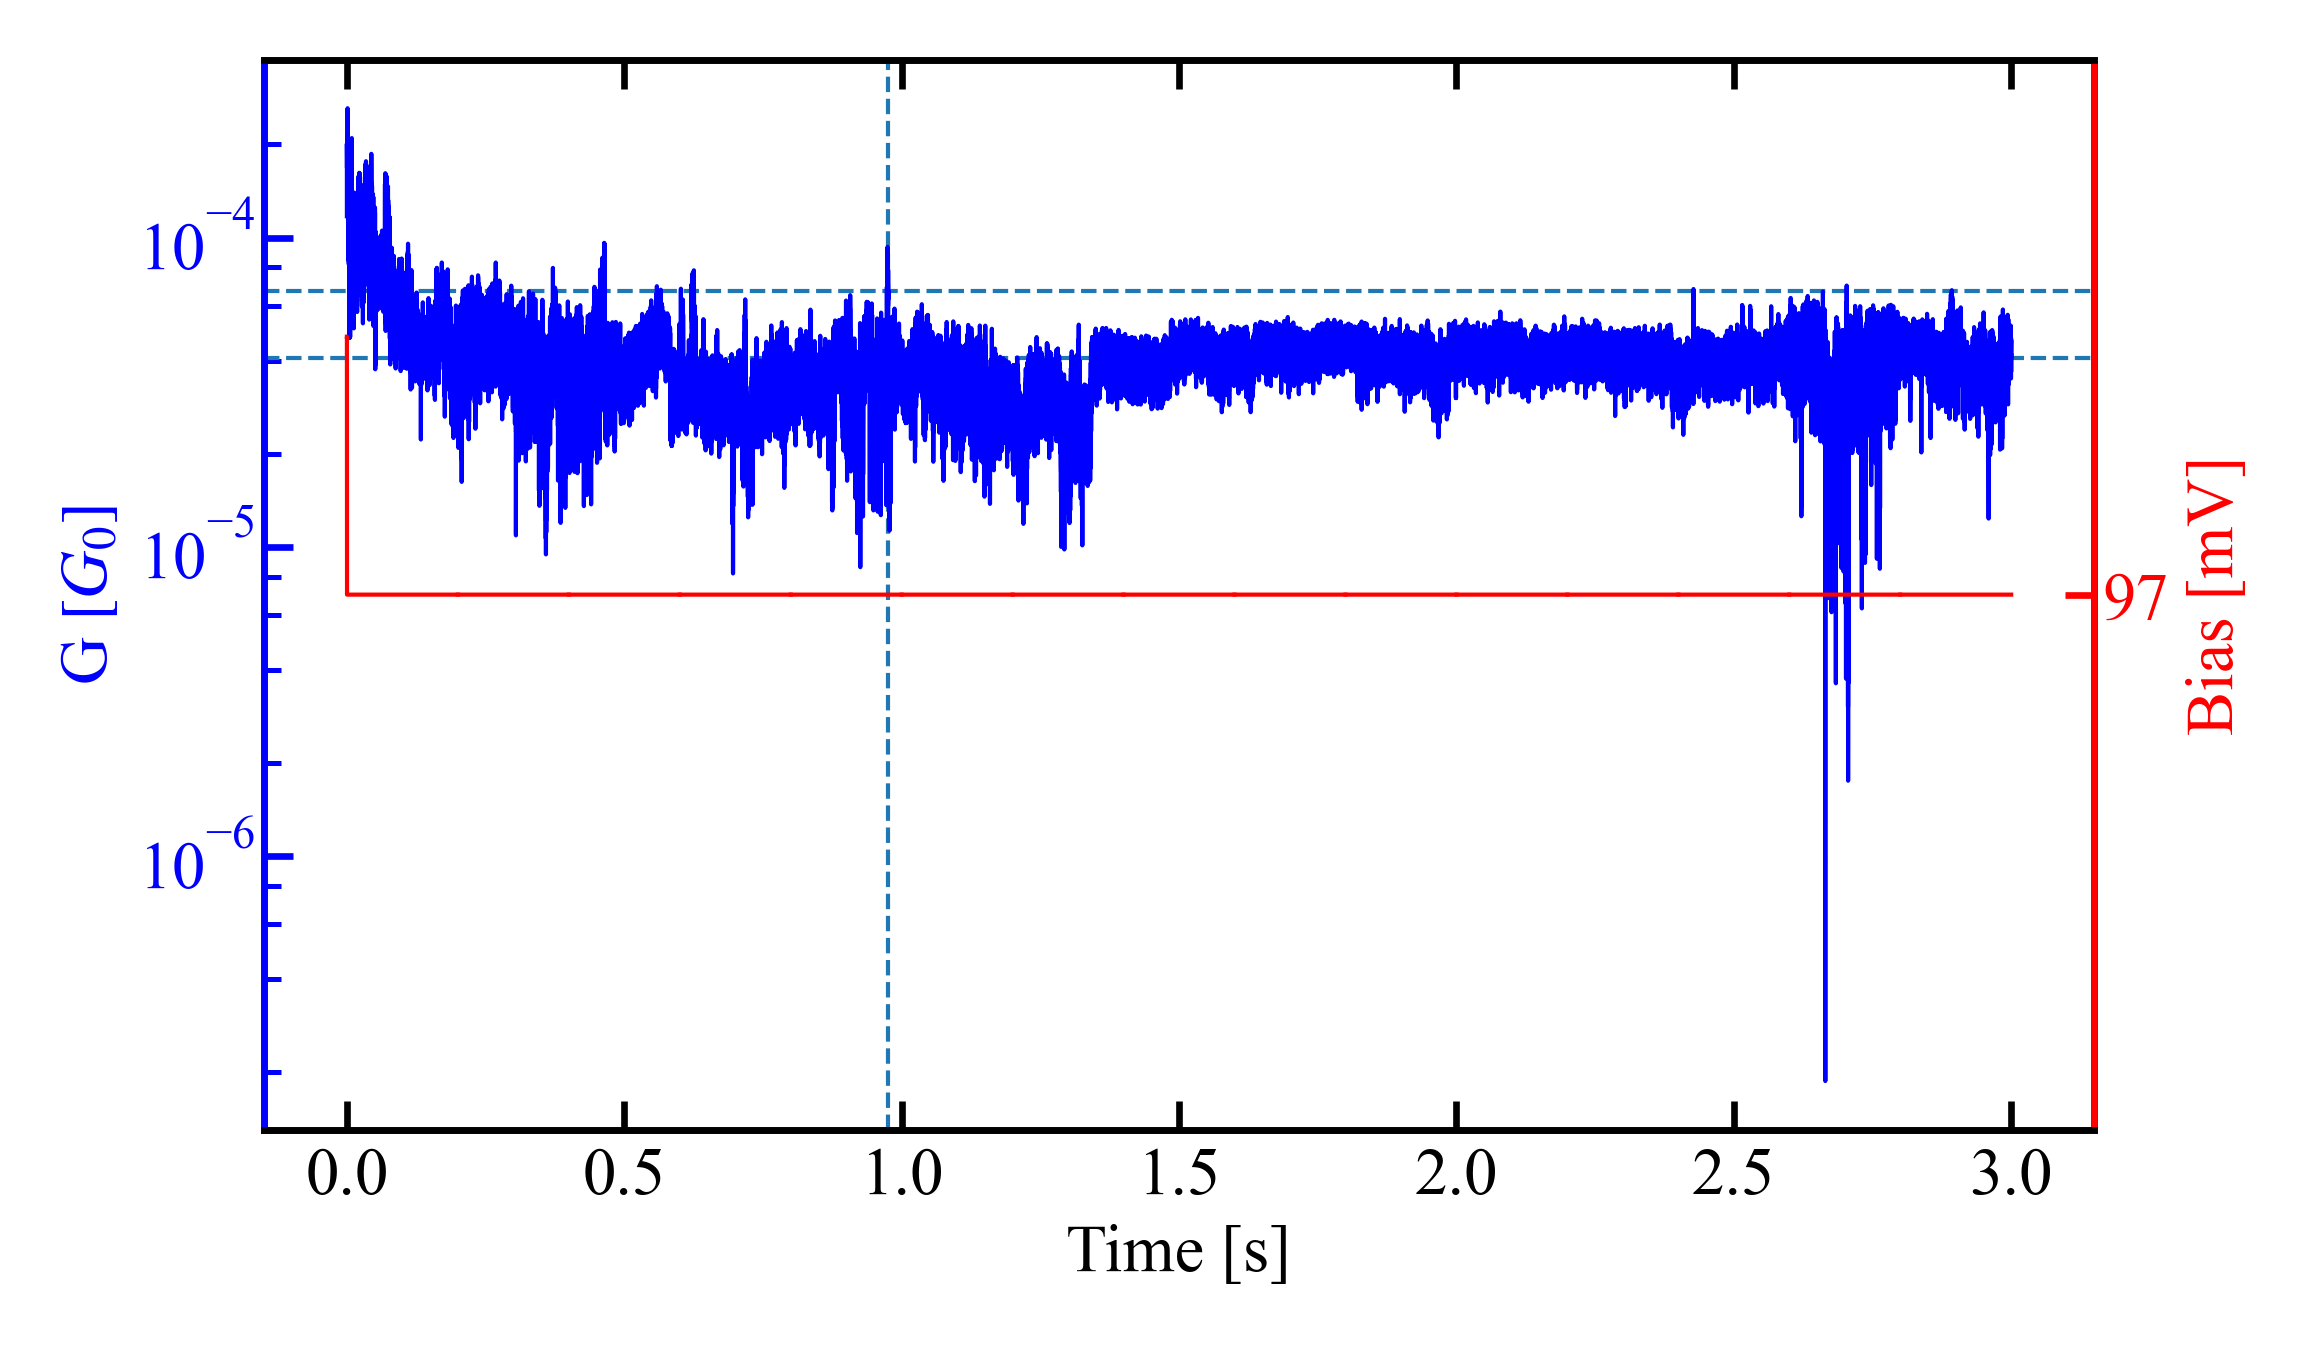

In [58]:
relax_ends_at, relax_time, relax_amount = filter_traces.measure_relaxation(hold_trace.hold_conductance_pull,
                                                                           conductance_limit=2)

ax_cond, par = hold_trace.plot_hold_traces(conductance=True)
# ax_cond.set_ylim(1e-4, 2e-3)

ax_cond.axvline(relax_time, lw=0.5, ls="--")

ax_cond.axhline(cond_avg, lw=0.5, ls="--")
ax_cond.axhline(cond_avg + 2*cond_std, lw=0.5, ls="--")

(0.0, 10.0)

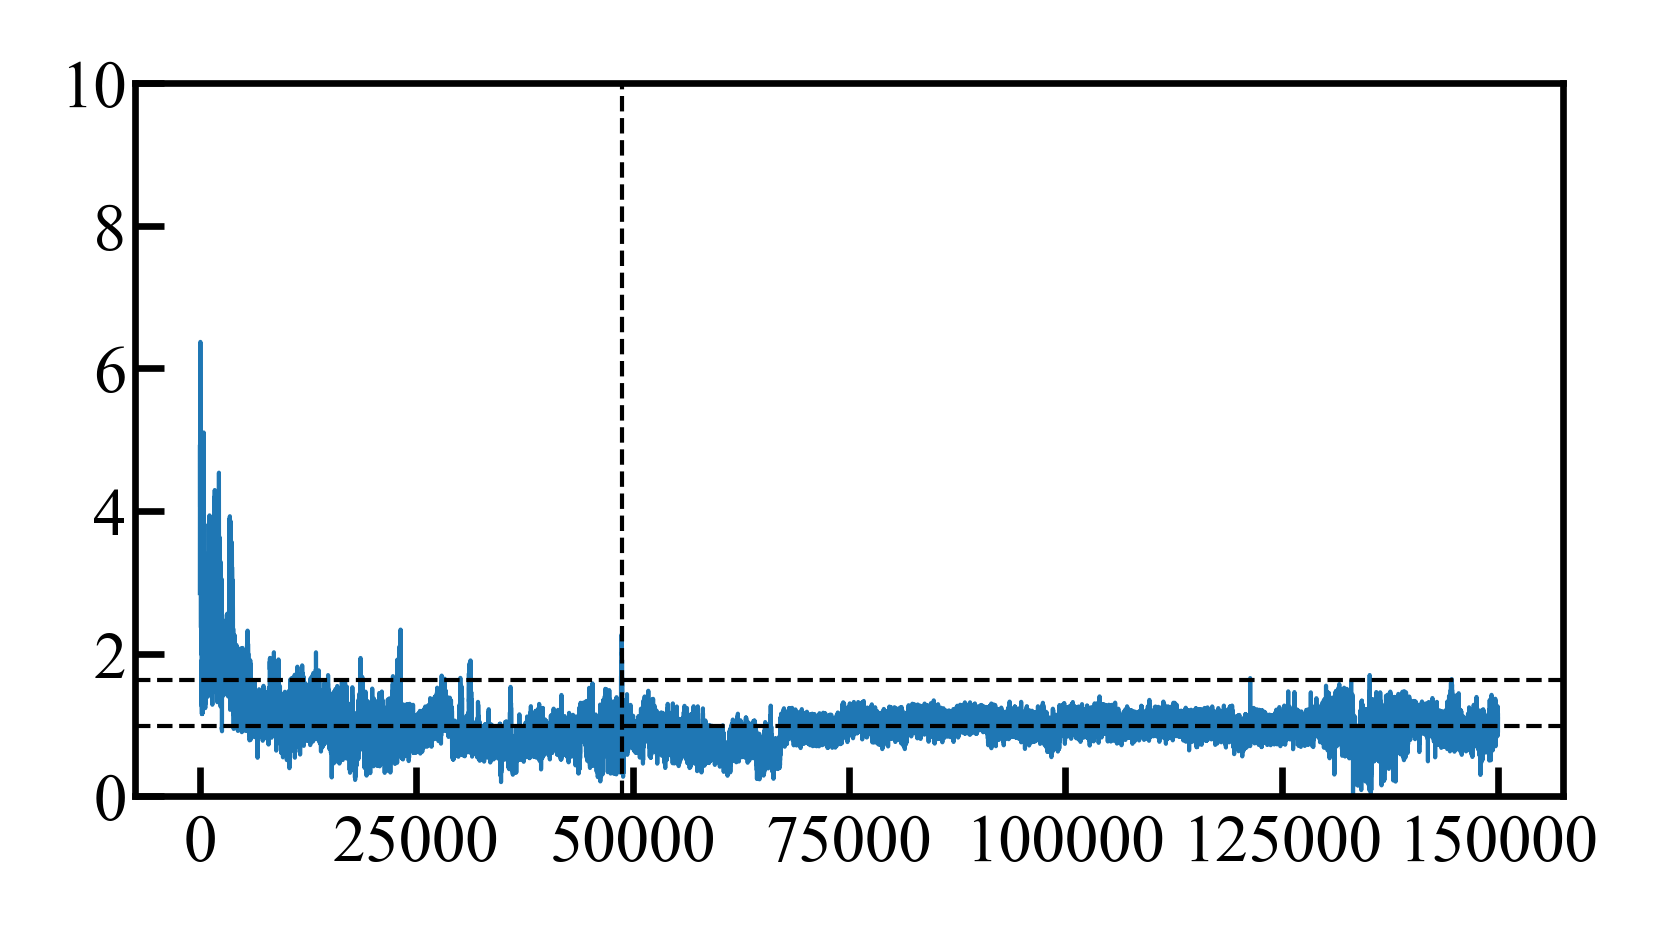

In [59]:
scaled_conductance = hold_trace.hold_conductance_pull/scaling_val

fig, ax = plt.subplots(1, figsize=utils.cm2inch(7.8, 4), dpi=600)
ax.plot(scaled_conductance, lw=0.5)
ax.axhline(scaled_cond_avg, lw=0.5, ls="--", c='k')
ax.axhline(scaled_cond_avg + 2*scaled_cond_std, lw=0.5, ls="--", c='k')
ax.axvline(relax_ends_at, lw=0.5, ls="--", c='k')
ax.set_ylim(0, 10)

In [15]:
np.nonzero(scaled_conductance > scaled_cond_avg + 2*scaled_cond_std)[0][-1]

18900

In [16]:
print(relax_ends_at)
print(relax_time)
print(relax_amount)

18900
0.378
-0.0006062589493026158


In [17]:
hold_trace.hold_conductance_pull[4]

0.00016670149737229334